# Titanic Survival Prediction using Machine Learning

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## Loading Datasets

In [2]:
df=pd.read_csv('train.csv')
df1=pd.read_csv('test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Data Information

In [5]:
df.shape

(891, 12)

In [6]:
df1.shape

(418, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Preparation

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
df1[df.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [14]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(891, 12)

In [15]:
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True, inplace=True)
df1.shape

(418, 11)

In [16]:
median = df["Age"].median()
median2=df1["Age"].median()

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df1['Age'] = df1['Age'].fillna(df1['Age'].median())


In [18]:
df['Embarked'] = df['Embarked'].fillna(str(df['Embarked'].mode()))
df1['Embarked'] = df1['Embarked'].fillna(str(df1['Embarked'].mode()))

## Data Preparation

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [20]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
df1["Fare"].mean()

35.627188489208635

<Axes: >

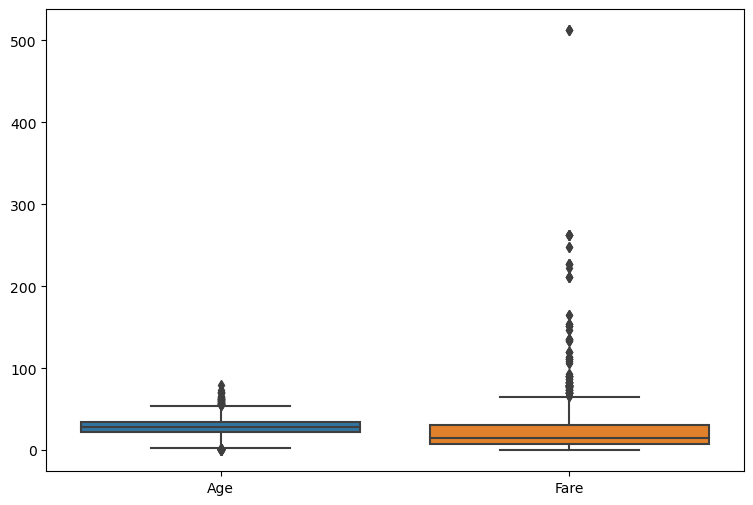

In [22]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df[['Age','Fare']])

<Axes: >

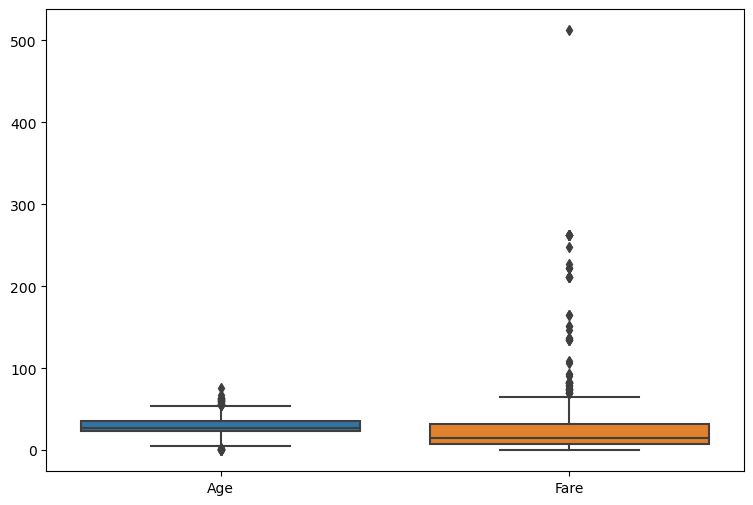

In [23]:
#Plot for test dataset
plt.figure(figsize=(9,6))
sns.boxplot(data=df1[['Age','Fare']])

In [24]:

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)



    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in ['Age','Fare']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in Age attribute : [0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 55.0, 55.0, 55.5, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 64.0, 64.0, 65.0, 65.0, 65.0, 66.0, 70.0, 70.0, 70.5, 71.0, 71.0, 74.0, 80.0]
Outliers in Fare attribute : [66.6, 66.6, 69.3, 69.3, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 71.0, 71.0, 71.2833, 73.5, 73.5, 73.5, 73.5, 73.5, 75.25, 76.2917, 76.7292, 76.7292, 76.7292, 77.2875, 77.2875, 77.9583, 77.9583, 77.9583, 78.2667, 78.2667, 78.85, 78.85, 79.2, 79.2, 79.2, 79.2, 79.65, 79.65, 79.65, 80.0, 80.0, 81.8583, 82.1708, 82.1708, 83.1583, 83.1583, 83.1583, 83.475, 83.475, 86.5, 86.5, 86.5, 89.1042, 89.1042, 90.0, 90.0, 90.0, 90.0, 91.0792, 91.0792, 93.5, 93.5, 106.425, 106.425, 108.9, 108.9, 110.8833, 110.8833, 110.8833, 110.8833, 113.275, 113.275, 113.275, 12

In [25]:
#Outliers for test set
def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)



    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in ['Age','Fare']:
    outliers = detect_outliers_iqr(df1[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in Age attribute : [0.17, 0.33, 0.75, 0.83, 0.92, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 57.0, 57.0, 57.0, 58.0, 59.0, 60.0, 60.0, 60.0, 60.5, 61.0, 61.0, 62.0, 63.0, 63.0, 64.0, 64.0, 64.0, 67.0, 76.0]
Outliers in Fare attribute : []


<Axes: >

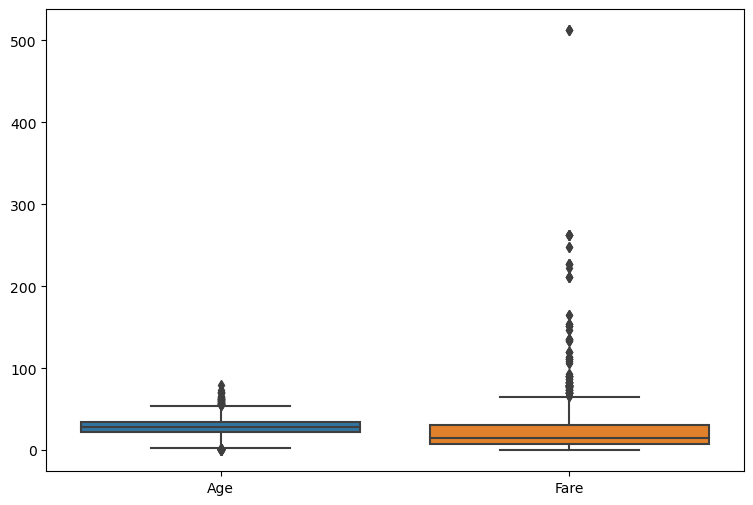

In [26]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df[['Age','Fare']])

<Axes: >

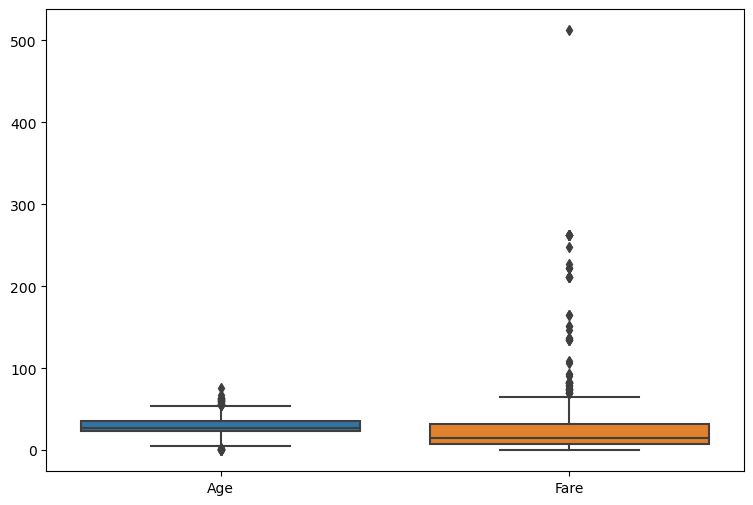

In [27]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df1[['Age','Fare']])

In [28]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train = df
train['Sex'] = le.fit_transform(train['Sex'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train = df1
train['Sex'] = le.fit_transform(train['Sex'])
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

### Correlation between the parameters and the target variable (Survived)

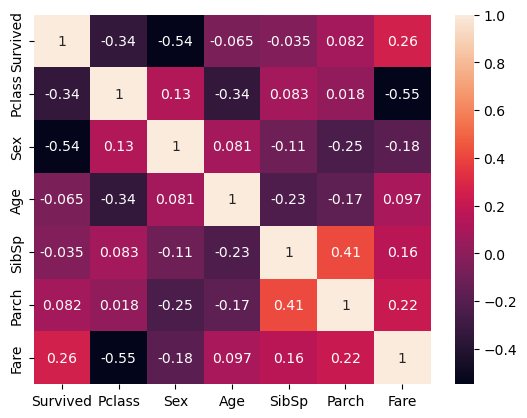

In [31]:
heatmap = sns.heatmap(df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot = True)


### While comparing survived column with rest of the columns we can see that Parch and Fare shows little correlation and other columns are not related. But it does not mean that the other features are useless. We’ll explore more about them below.

## Plotting of Graphs of Train Dataset (To understand what function to use to train the model)


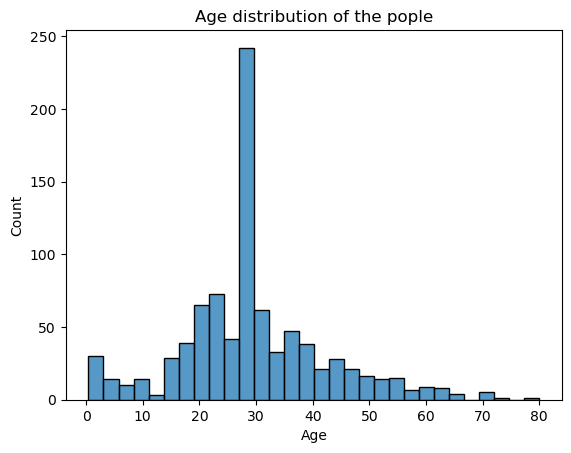

In [32]:
sns.histplot(df.Age)
plt.title('Age distribution of the pople')
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

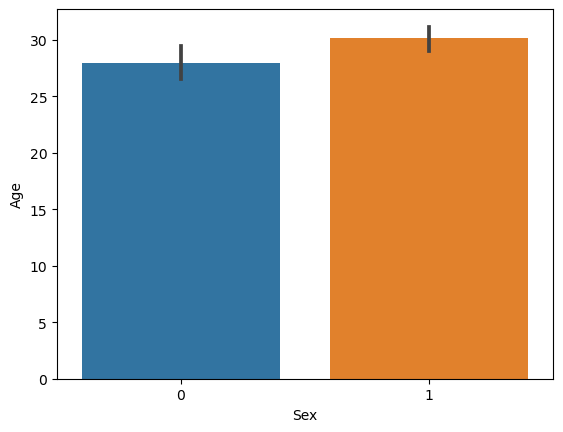

In [33]:
sns.barplot(x='Sex',y='Age',data=df)

<Axes: xlabel='Age', ylabel='Fare'>

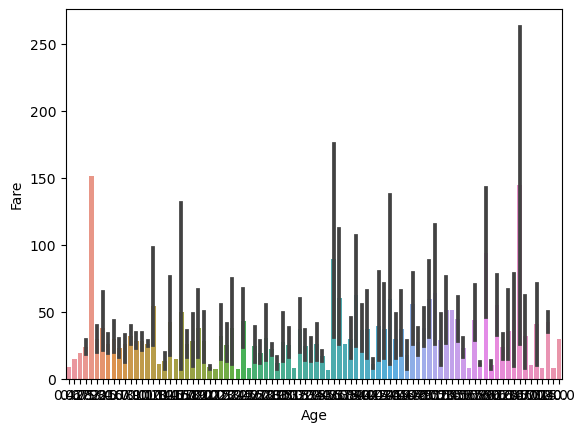

In [34]:
sns.barplot(x='Age',y='Fare',data=df)

<Axes: xlabel='Age', ylabel='Fare'>

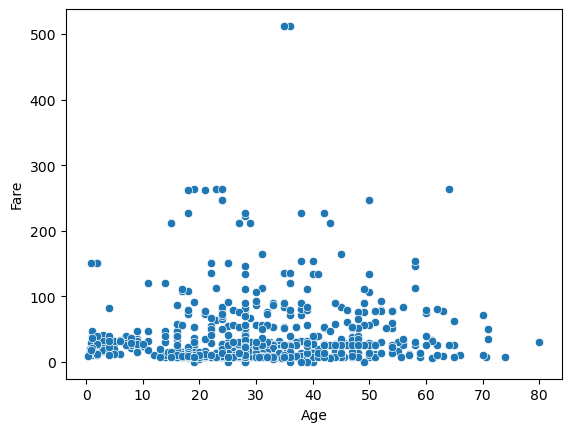

In [35]:
sns.scatterplot(x='Age',y='Fare',data=df)

#### It is use to plot pairwise relationships between variables within a dataset, it is applicable to numeric columns only.

## Dependent variable

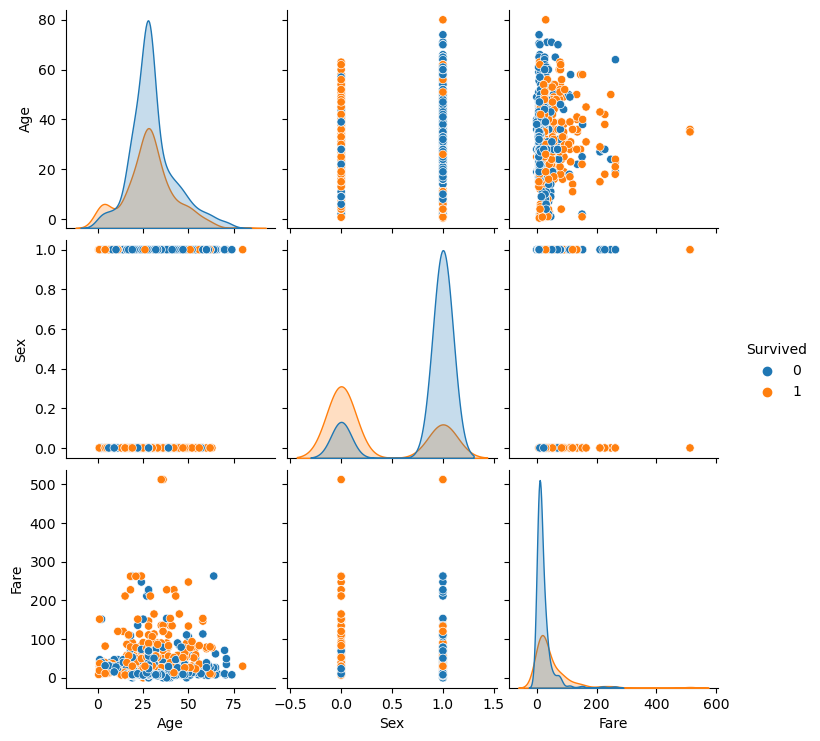

In [36]:
sns.pairplot(df[['Age','Sex','Fare','Survived']],hue='Survived')   

### While comparing survived column with rest of the columns we can see that Parch and Fare shows little correlation and other columns are not related. 
# Other Important Features 

## 1. Gender Column

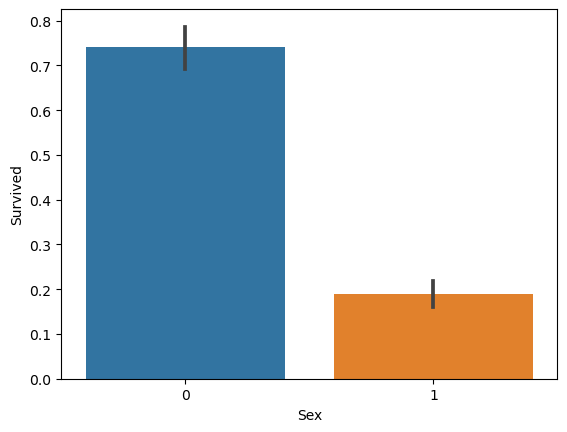

In [37]:
sexplot = sns.barplot(x="Sex", y="Survived", data=df)


### Sex vs Survived plot shows female have more chances of survival over male.

## 2. Age Column

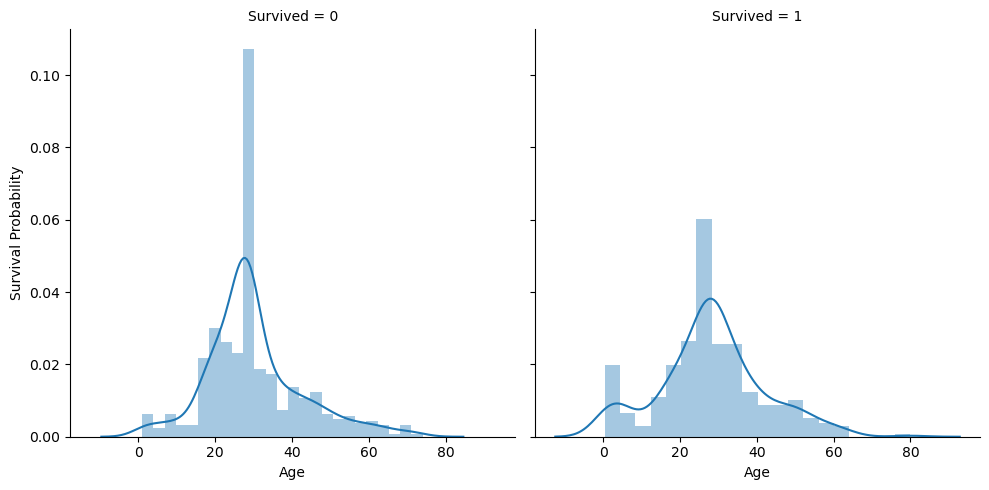

In [38]:
ageplot = sns.FacetGrid(df, col="Survived", height = 5)
ageplot = ageplot.map(sns.distplot, "Age")
ageplot = ageplot.set_ylabels("Survival Probability")

### Age vs Survival probability graph shows more the age of people are less likely to survive.

## 3. Pclass Column

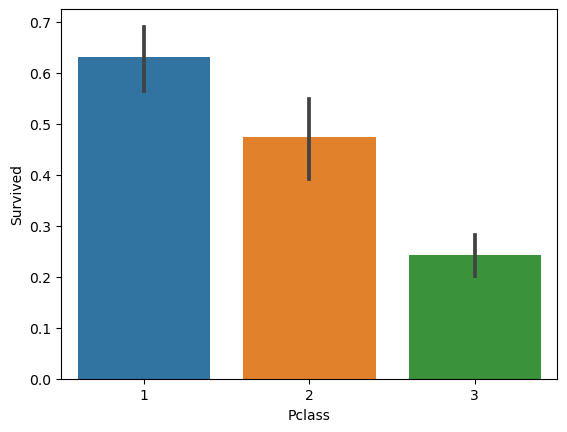

In [39]:
pclassplot = sns.barplot(x = 'Pclass', y = 'Survived', data = df)


### 1st class passengers has more chances of survival over 2nd and 3rd class passengers. Similarly 2nd class passengers has more chances of survival over 3rd class passengers.

# Machine Learning Model to Predict Titanic Survival

In [40]:
pred = ["Pclass","Age","Sex","Fare"]
x_train = pd.DataFrame(df[pred].values)
x_test = pd.DataFrame(df1[pred].values)
y_train = pd.DataFrame(df["Survived"].values)
x_train[:25]

,0,1,2,3
0,3.0,22.0,1.0,7.2500
1,1.0,38.0,0.0,71.2833
2,3.0,26.0,0.0,7.9250
3,1.0,35.0,0.0,53.1000
4,3.0,35.0,1.0,8.0500
5,3.0,28.0,1.0,8.4583
6,1.0,54.0,1.0,51.8625
7,3.0,2.0,1.0,21.0750
8,3.0,27.0,0.0,11.1333
9,2.0,14.0,0.0,30.0708


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression()

In [42]:
model.fit(x_train,y_train)

LogisticRegression()

In [43]:
x_test = x_test.fillna(0)

In [44]:
y_predict=model.predict(x_test)
y_predict[:30]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [59]:
scores = cross_val_score(model_l, x_train, y_train)
x=np.average(scores)
print("Accuracy: ",x*100,"%")

Accuracy:  78.67553825874081 %


## Implementing Cross Validation

In [45]:
model_l = LogisticRegression(C=10)
scores = cross_val_score(model_l, x_train, y_train, cv=4)

In [60]:
x=np.average(scores)
print("Accuracy: ",x*100,"%")

Accuracy:  78.67553825874081 %


In [47]:
model_l.fit(x_train, y_train)


LogisticRegression(C=10)

In [61]:
predict = model_l.predict(x_test)
predict[:250]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

#### Initially, we used Logistic Regression as a Machine Learning model for predication which produced accuracy around 78.6%. After cross-validating the model the accuracy was 78.67%

#### Predicting the survival of the passengers is seen above, this wraps up the prediction of Titanic Survival
